# README
Learn how to create an instrument script and run it

# Preparation

## import tools

In [1]:
import os, numpy as np
import histogram.hdf as hh
import mcvine, mcvine.components

from matplotlib import pyplot as plt
%matplotlib notebook

## work dir

In [2]:
workdir = os.path.expanduser("~/simulations/mcvine/demo")
!mkdir -p {workdir}
%cd {workdir}

/home/97n/simulations/mcvine/demo


# Simulation

## create script

In [3]:
%%file myinstrument.py
import mcvine, mcvine.components
instrument = mcvine.instrument()
instrument.append(mcvine.components.sources.Source_simple('source'), position=(0,0,0))
instrument.append(mcvine.components.monitors.E_monitor('monitor', filename='IE.dat'), position=(0,0,1))

Overwriting myinstrument.py


## check/debug script

In [4]:
%%python
from mcvine import run_script
run_script.run1('./myinstrument.py', 'debug', ncount=10, overwrite_datafiles=True)

Source_simple: initialized.
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -0.1, 0.1
finalize component "source"
<E> : 59.2604 meV , E-width : 5.20021 meV 
E_monitor: saved data to file 'IE.dat'.
E_monitor: finalized.
finalize component "monitor"


In [5]:
ls ./debug

IE.h5  post-processing-scripts/  step0/


<IPython.core.display.Javascript object>


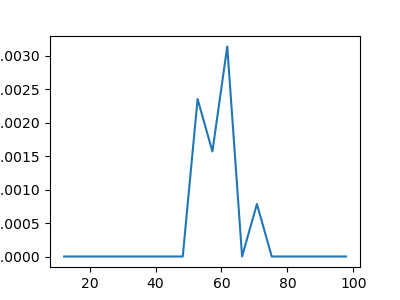

In [6]:
IE = hh.load('./debug/IE.h5')
plt.figure(figsize=(4,3))
plt.plot(IE.energy, IE.I)

## production run

In [7]:
from mcvine import run_script

In [8]:
%%time
run_script.run_mpi('./myinstrument.py', 'work', ncount=1e6, nodes=10, overwrite_datafiles=True)

Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -0.1, 0.1
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
Source_simple: initialized.
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -0.1, 0.1
Source_simple: initialized.
E_monitor: initialized. E window=10,100, x window=-0.1,0.1, y window = -

CPU times: user 27.2 ms, sys: 9.34 ms, total: 36.5 ms
Wall time: 1.05 s


In [9]:
ls work/

IE.h5                     rank2-step1/  rank4-step4/  rank7-step2/
post-processing-scripts/  rank2-step2/  rank5-step0/  rank7-step3/
rank0-step0/              rank2-step3/  rank5-step1/  rank7-step4/
rank0-step1/              rank2-step4/  rank5-step2/  rank8-step0/
rank0-step2/              rank3-step0/  rank5-step3/  rank8-step1/
rank0-step3/              rank3-step1/  rank5-step4/  rank8-step2/
rank0-step4/              rank3-step2/  rank6-step0/  rank8-step3/
rank1-step0/              rank3-step3/  rank6-step1/  rank8-step4/
rank1-step1/              rank3-step4/  rank6-step2/  rank9-step0/
rank1-step2/              rank4-step0/  rank6-step3/  rank9-step1/
rank1-step3/              rank4-step1/  rank6-step4/  rank9-step2/
rank1-step4/              rank4-step2/  rank7-step0/  rank9-step3/
rank2-step0/              rank4-step3/  rank7-step1/  rank9-step4/


In [10]:
cat work/rank0-step0/number_of_mc_samples

20000

<IPython.core.display.Javascript object>


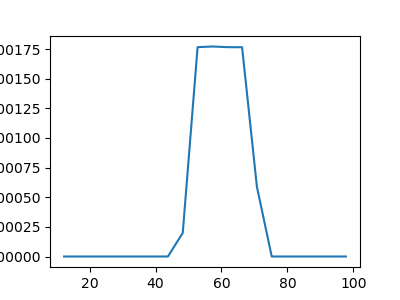

In [12]:
IE = hh.load('./work/IE.h5')
plt.figure(figsize=(4,3))
plt.plot(IE.energy, IE.I)